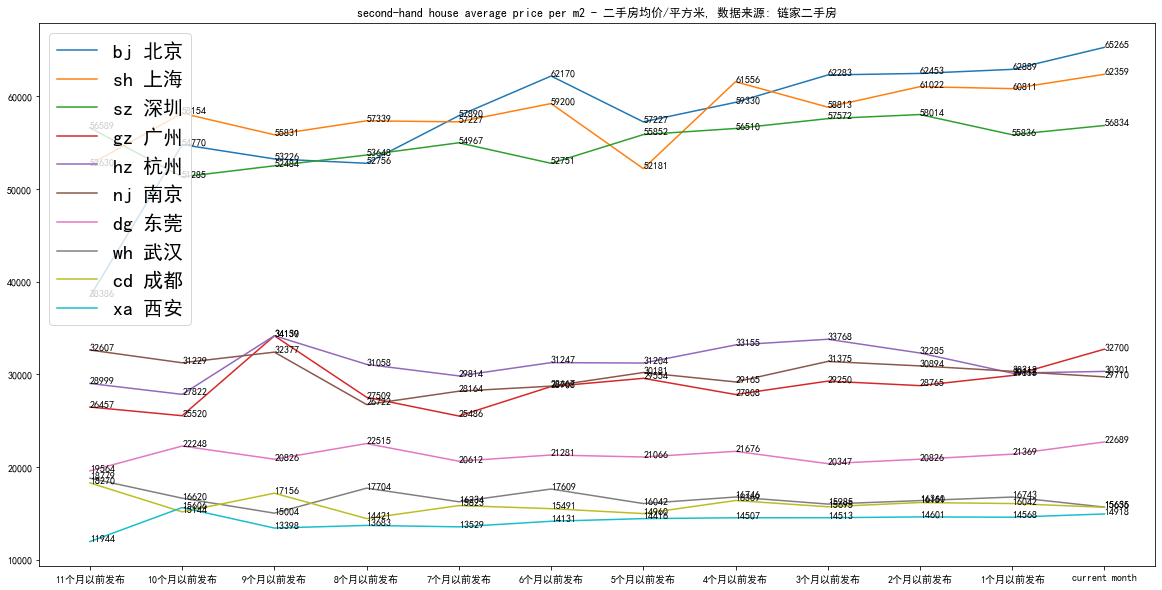

In [3]:
###
import pandas as pd
import matplotlib.pyplot as plt


def read_data(file_path="C:/Users/Admin/Desktop/2022-10-27_sh.csv"):
    df_data = pd.read_csv(file_path, index_col=0)
    df_data[['follower','release_time']] = df_data['followInfo'].str.split("/", expand=True) # 
    df_data['release_time'] = df_data['release_time'].str.strip()
    df_data[ ['whole_price', 'unit_price'] ] = df_data['priceInfo'].str.split('万', expand=True)
    df_data['whole_price'] = df_data['whole_price'].str.replace('参考价: ', '')
    df_data['whole_price'] = df_data['whole_price'].astype(float)
    df_data['unit_price'] = df_data['unit_price'].str[:-3]
    df_data['unit_price'] = df_data['unit_price'].str.replace(',', '')
    df_data['unit_price'] = df_data['unit_price'].astype(int)
    return df_data

def daily_str():
    tmp = []
    for day_num in range(1, 32):
        tmp.append( str(day_num)+'天以前发布' )
    return tmp

def monthly_str():
    tmp = []
    for month_num in range(1, 12):
        tmp.append( str(month_num)+'个月以前发布' )
    return tmp

def time_group(df_data):
    time_data = list( set(df_data['release_time']) )
    day_list, month_list, other_list = [], [], []
    for it in time_data:
        if '天以前发布' in it or '刚刚发布' in it:
            day_list.append( it )
        elif '个月以前发布' in it:
            month_list.append( it )
        else:
            other_list.append( it )
    return day_list, month_list, other_list

def get_current_month(df_data, day_list, feature_name='unit_price'):
    month_list = []
    for day in day_list:
        tmp = df_data[ df_data['release_time']==day ]
        price_list = list(tmp[feature_name])
        month_list += price_list
    return month_list

def get_before_month(df_data, month, feature_name='unit_price'):
    tmp = df_data[ df_data['release_time']==month ]
    month_list = list(tmp[feature_name])
    return month_list

def basic_statistics(month_data):
    L = len(month_data)
    if L<=0:
        return 0, 0, 0
    # in order to avoid extreme values, 
        # so, remove the top n% and bottom n%
    extreme_percent = 10 * 0.01
    month_data = sorted(month_data)
    month_data = month_data[ int(L*extreme_percent):int(L*(1-extreme_percent)) ]
    L = len(month_data)
    S = sum(month_data)
    avg = S/L
    std = 0
    for v in month_data:
        std = std + (v-avg)*(v-avg)
    std = std/L
    return L, round(avg), round(std)


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 10))

feature_name='unit_price' # unit_price, whole_price
city_list = ['bj', 'sh', 'sz', 'gz', 'hz', 'nj', 'dg', 'wh', 'cd', 'xa']
city_name = {'bj':'北京', 'sh':'上海', 'sz':'深圳', 'gz':'广州', 'hz':'杭州', 'nj':'南京', 'dg':'东莞', 'wh':'武汉', 'cd':'成都', 'xa':'西安'}
for city in city_list[:]:
    file_path="C:/Users/Admin/Desktop/2022-10-27_" + city + ".csv"
    df_data = read_data(file_path)
    #
    x1, x2, x3 = [], [], []
    y1, y2, y3 = [], [], []
    day_list, month_list, other_list = time_group(df_data)
    #print( len(day_list), len(month_list), len(other_list) )
    current_month = get_current_month(df_data, day_list, feature_name)
    L, A, S = basic_statistics(current_month)
    #print( "current month",  L, A, S)
    y1.append( L )
    y2.append( A )
    y3.append( S )
    month_list = monthly_str()
    for month in month_list:
        before_month = get_before_month(df_data, month, feature_name)
        L, A, S = basic_statistics(before_month)
        #print( month, L, A, S )
        y1.append( L )
        y2.append( A )
        y3.append( S )
    #
    x1 = ["current month"] + month_list
    x2 = sorted(list( range(len(x1)) ), reverse=True)
    #
    show_x, show_y = x2, y2
    plt.plot(show_x, show_y, label=city+" " + city_name[city])
    plt.xticks(show_x, x1)
    for i in range(len(show_x)):
        plt.text(show_x[i],show_y[i],show_y[i])
plt.legend(fontsize = 20, loc='upper left')
if feature_name=='whole_price':
    plt.title('second-hand house average price per house - 二手房均价/套, 数据来源: 链家二手房')
else:
    plt.title('second-hand house average price per m2 - 二手房均价/平方米, 数据来源: 链家二手房')
plt.show() 